# iris project

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# reading the csv

In [2]:
import pandas as pd
df=pd.read_csv('iris.csv')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

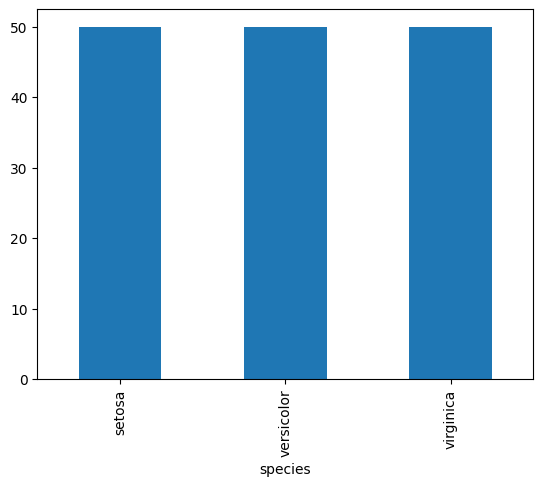

In [6]:
df.species.value_counts().plot(kind='bar')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

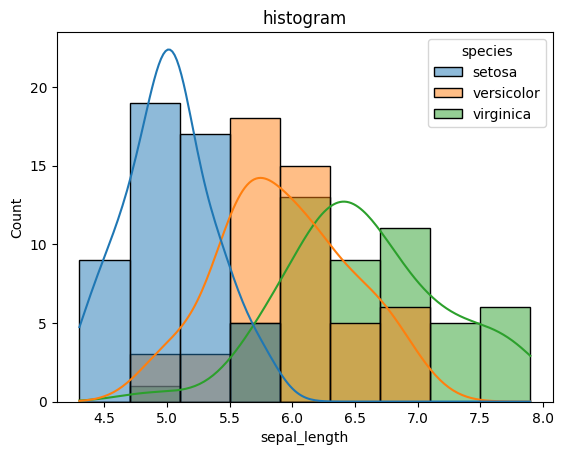

In [8]:
sns.histplot(data=df,x='sepal_length',kde=True,hue='species')
plt.title('histogram')
plt.show()

Define X and Y

In [9]:
x=df.drop(['species'],axis=1)
y=df['species']

In [10]:
x

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [11]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [15]:
pipe=Pipeline(steps=[('scalar',StandardScaler())])

In [16]:
x1=pd.DataFrame(pipe.fit_transform(x),columns=pipe.get_feature_names_out())
x1

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [17]:
import pickle

In [18]:
with open('pipe.pkl','wb') as file1:
     pickle.dump(pipe,file1)

In [19]:
la=LabelEncoder()
y1=la.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Train_test Split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=23)

Model building with tunning

In [25]:
kn=KNeighborsClassifier()

In [26]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
grid={'n_neighbors':[2,3,4,5,6,7,8]}

In [28]:
gs=GridSearchCV(kn,param_grid=grid,cv=2)
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]})

In [29]:
gs.best_params_

{'n_neighbors': 8}

In [30]:
best_knn=gs.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

Traning Data Evalution

In [31]:
y_pred_train=best_knn.predict(x_train)


acc=accuracy_score(y_pred_train,y_train)
clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)

print("accuracy_score:",acc)
print("classification_report:",clf)
print("confusion_matrix:",cnf)

accuracy_score: 0.9583333333333334
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.94        45
           2       0.90      0.97      0.94        37

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

confusion_matrix: [[38  0  0]
 [ 0 41  4]
 [ 0  1 36]]


Testing Data Evalution

In [32]:
y_pred_test=best_knn.predict(x_test)


acc1=accuracy_score(y_pred_test,y_test)
clf1=classification_report(y_pred_test,y_test)
cnf1=confusion_matrix(y_pred_test,y_test)

print("accuracy_score:",acc1)
print("classification_report:",clf1)
print("confusion_matrix:",cnf1)

accuracy_score: 0.9666666666666667
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix: [[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


Unseen data prediction

In [33]:
def predict_data(le,num_pipe,model):
    sepal_length=float(input('Enter the sepal length'))
    sepal_width=float(input('Enter the sepal_width:'))
    petal_length=float(input('Enter the petal length:'))
    petal_width=float(input('Enter the petal_width:'))

    x1=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    x1.columns=x.columns

    print('Data Before Preprocessing:\n',x1)

    x_pre1=num_pipe.transform(x1)
    x_pre2=pd.DataFrame(x_pre1,columns=num_pipe.get_feature_names_out())

    print('After Preprocessing:\n',x_pre2)

    y_pred1=model.predict(x_pre2)
    label=le.inverse_transform(y_pred1)[0]

    prob=model.predict_proba(x_pre1).max()

    prediction=f'{label} with probability {prob}'
    print('Prediction:',prediction)

    return label,prob

In [34]:
predict_data(la,pipe,best_knn)

Data Before Preprocessing:
    sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           4.0          3.0
After Preprocessing:
    sepal_length  sepal_width  petal_length  petal_width
0     -4.656885    -4.735915      0.137547     2.370257
Prediction: versicolor with probability 0.75


c:\Users\Aaji\Desktop\dploy_project\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('versicolor', np.float64(0.75))